## Setup

In [4]:
def show_image(im, ax=None):
    ''' Show an image.   
    
    Parameters
    ----------
    im : np.array
        An image represented as a numpy matrix
    ax : None or a matplotlib `axis` object
        If None, create a new matplotlib figure and add a single `axis` to it. 
        Otherwise, use the supplied `axis`. The image will be shown on `ax`
        
    Returns
    -------
    Matplotlib axis with the image
    '''
    if ax is None:
        h = 10
        w = h / 4 * 3
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(w, h))
    ax.imshow(im, cmap='gray')
    ax.set_axis_off()
    return ax   

In [5]:
import numpy as np
from matplotlib import pylab as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
# import image
from glob import glob
im0 = plt.imread('./nayalon/nayalon-0001.png') # a sample image

## Dimming out an image

In the class, we saw how we can reduce the brightness of an image by multiplying its values by a value between 0 and 1. Load the first image from the image directory. Here, you will create a graduate dimming effect: the image will be brighter at the top, and darker at the bottom. Every row in the original image should have the same effect. To do that, first generate a dimming matrix with values between 1 and 0.

Consider using the `np.tile`, `np.reshape`, `np.dstack` and `np.linspace` functions

In [7]:
# show image dimensions, 3 channels rgb
im0.shape

(480, 720, 3)

In [8]:
# create rows of dimming
dim_array = np.linspace(1, 0, num=(480))



# take first array and create 720 columns, 2d matrix (480 by 720)
dimming_matrix = np.stack([dim_array for i in range(720)], axis = 1)


In [9]:
dimming_matrix.shape

(480, 720)

Apply the matrix to the image `im0` by multiplying the original image by `dimming_matrix`. 

Create a single `matplotlib` figure with three sublots arranged in one row. Use the `plt.subplots` function, as demonstrated in the notebook "02_03 Image manipulation" that we saw today. Plot the following figures, from left to right: the original image, the dimming matrix, the dimmed image. To display a matrix `M` on an Axis object named `ax`, type `ax.imshow(M)`. Save the resulting image to a file `dimming_out.png'

In [10]:
# make the 2d image grayscale into a 3d cube for rgb conversion
image_3d = np.dstack([dimming_matrix] *3)
image_3d.shape

(480, 720, 3)

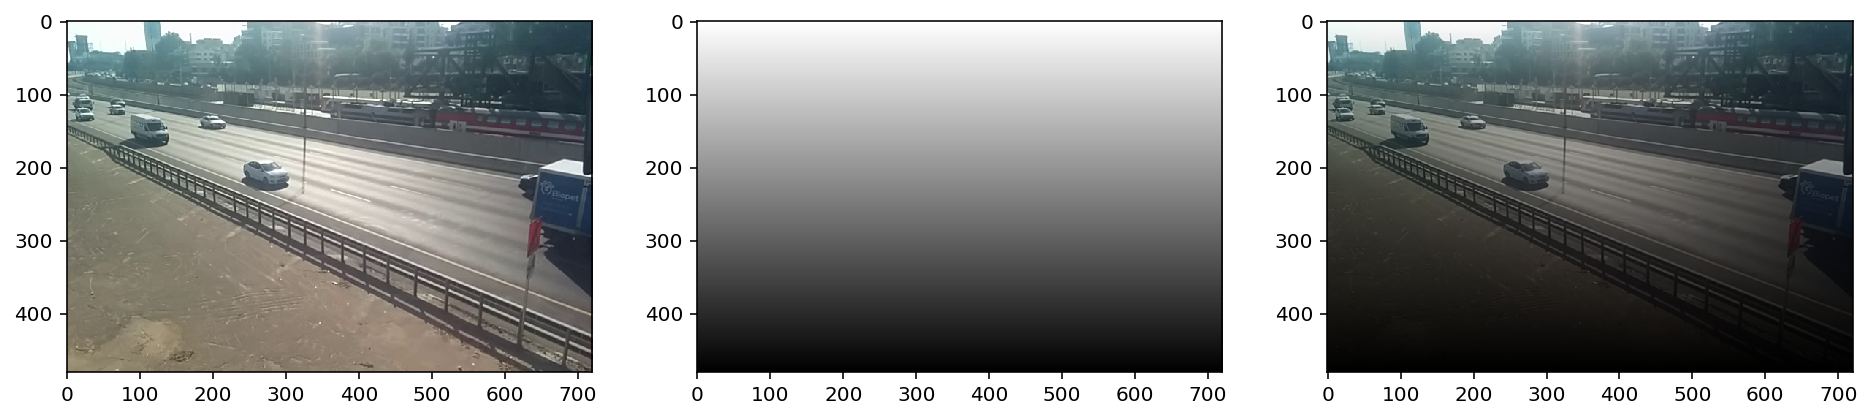

In [11]:
#show_image(new_img*im0)

fig, axes = plt.subplots(1,3 , figsize=(16, 6))
# plt.imshow(im0)
# plt.imshow(dimming_matrix)
# plt.imshow(new_img*im0)


axes[0].imshow(im0)
axes[1].imshow(dimming_matrix, cmap='gray')
axes[2].imshow(image_3d*im0)
#axes.plot(plt.imshow(dimming_matrix))
#axes.plot(plt.imshow(new_img*im0))


In [12]:
# Solution

## Under- and over-exposed pixels

Let's define an over-exposed pixel in an image in which the values of all the three values are above 0.8. Similarly, an underexposed pixel is a pixel in which all the three channels have the values are below 0.2.

Copy the `im0` image to another variable. Change each underxposed pixel to blue (RGB values: `(0, 0, 1)`). Change each overexposed pixel to red (`(1,0,0)`). 

Create a figure with two subplots. Show the original image in the leftmost subplot, and the marked image in the rightmost one.

Consider using the functions `np.all`, `np.any`

In [13]:
threshold_underexposed = 0.2
threshold_overexposed = 1.0 - threshold_underexposed
# ............
# fig, axes = plt.subplots(..., figsize=(10, 5))
# ...........
# fig.savefig('over_and_underexposed.png')
marked = im0.copy()

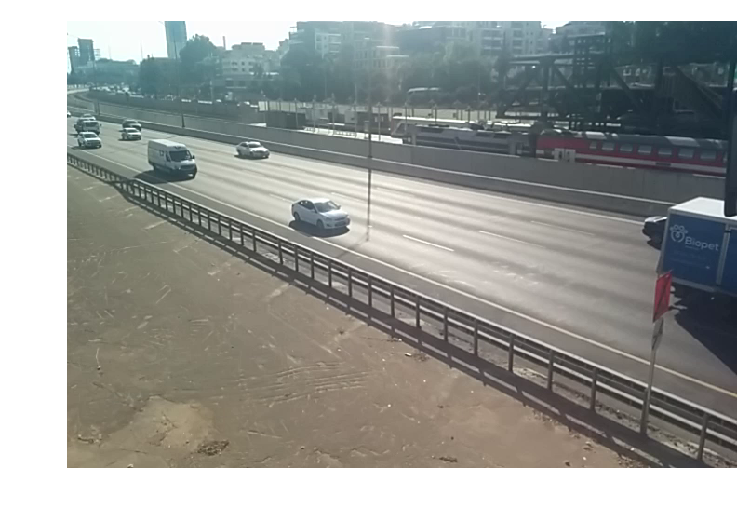

In [14]:
show_image(im0)

In [15]:
# underexposed change pixel to blue, overexposed change to red
threshold_underexposed = 0.2
threshold_overexposed = 1.0 - threshold_underexposed

for row in range(marked.shape[0]):
    for col in range(marked.shape[1]):
        if np.all(marked[row][col] <= threshold_underexposed):
            marked[row][col][0] = 0
            marked[row][col][1] = 0
            marked[row][col][2] = 1
        if np.all(marked[row][col] >= threshold_overexposed):
            marked[row][col][0] = 1
            marked[row][col][1] = 0
            marked[row][col][2] = 0
        else:
            continue

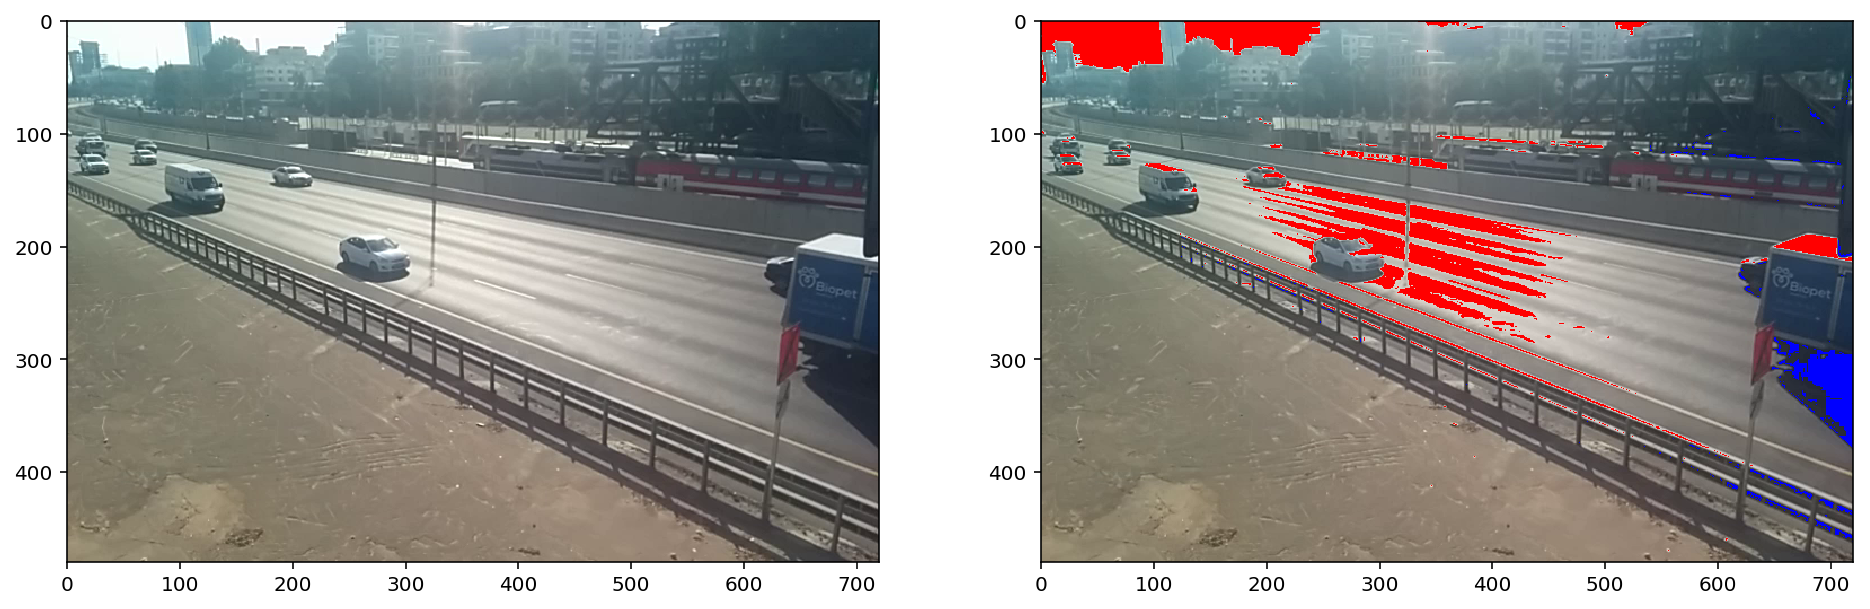

In [16]:

fig, axes = plt.subplots(1,2 , figsize=(16, 6))
# plt.imshow(im0)
# plt.imshow(dimming_matrix)
# plt.imshow(new_img*im0)


axes[0].imshow(im0)
axes[1].imshow(marked)

What is the percentage of under- and over- exposed pixels in every image in the `photos` dictionary? Create a pandas DataFrame with the following columns:

file name | % underexposed | % overexposed | % bad
----------| -------------- | --------------|----
image1    | 1.1            | 2.2           | 3.3
image1    | 3.3            | 4.4           | 7.7

The last columns ("% bad") is the sum of the under- and over-exposed pixels. Round the percentages to a single digit after the dot (`np.round` is a good way to round numbers). The column order is important.

The file names should **not** be the full path but rather the file name. Consider using `glob` for getting all the filenames in the directory, and `os.path.split` to separate between the path and the filename.

Sort the dataframe by the percentage of bad pixels (from higher to lower), and save it to a CSV file "over_and_underexposed.csv"


In [17]:
#import os
#import pandas as pd
#def percentage_over_and_underexposed(image):
#    ....
#    ...
#
#percentages.to_csv('over_and_underexposed.csv', index=False)

In [18]:
# Solution
from collections import OrderedDict
import os
import pandas as pd

image_paths = [i for i in os.listdir("./nayalon/")]


threshold_underexposed = 0.2
threshold_overexposed = 1.0 - threshold_underexposed


def percentage_over_and_underexposed(file_name):

    im_tmp = plt.imread('./nayalon/%s' %file_name) # a sample image

    
    total_pixels = im_tmp.shape[0]*im_tmp.shape[1]
    
    over_exposed = 0
    under_exposed = 0
    
    for row in range(im_tmp.shape[0]):
        for col in range(im_tmp.shape[1]):
            if np.all(im_tmp[row][col] <= threshold_underexposed):
                under_exposed += 1
            if np.all(im_tmp[row][col] >= threshold_overexposed):
                over_exposed += 1
            else:
                continue
                
    print under_exposed,over_exposed, total_pixels
    
    under_exposed = float(under_exposed) / total_pixels
    over_exposed = float(over_exposed) / total_pixels
    bad = under_exposed + over_exposed
    
    exposed_dict = OrderedDict({"file_name": file_name, 
                      "% underexposed": round(under_exposed*100,2),
                      "% overexposed": round(over_exposed*100,2),
                      "% bad": round(bad*100,2)})
  

    return pd.Series(exposed_dict)
                
exposed_series = pd.Series(image_paths).apply(lambda val: percentage_over_and_underexposed(val))

3447 20428 345600
1516 17729 345600
1356 20406 345600
2524 17494 345600
45 26254 345600
129 23911 345600
144 22642 345600
1630 23135 345600
24 25024 345600


In [19]:
over_and_underexposed_df = pd.DataFrame(exposed_series).sort_values("% bad", ascending = True).reset_index(drop = True)
over_and_underexposed_df.to_csv("./over_and_underexposed.csv")
over_and_underexposed_df

file_name  % bad  % overexposed  % underexposed
0  nayalon-0005.png   5.57           5.13            0.44
1  nayalon-0013.png   5.79           5.06            0.73
2  nayalon-0009.png   6.30           5.90            0.39
3  nayalon-0025.png   6.59           6.55            0.04
4  nayalon-0001.png   6.91           5.91            1.00
5  nayalon-0021.png   6.96           6.92            0.04
6  nayalon-0029.png   7.17           6.69            0.47
7  nayalon-0033.png   7.25           7.24            0.01
8  nayalon-0017.png   7.61           7.60            0.01

### Evolution of economic data

In this exercise, we will take a look at some economic data in Israel, as recorded by the WorldBank. First, we will load the relevant data. Make sure you understand every step in the cell below:

In [20]:
israel_data = pd.read_csv(
    '../ex1/country_metrics_multiyear.csv'
).dropna(
).set_index(
    'CountryCode'
).loc[
    'ISR'
].sort_values(
    'Year'
).reset_index(drop=True)

Let's take a look at the dynamics of the values in our data

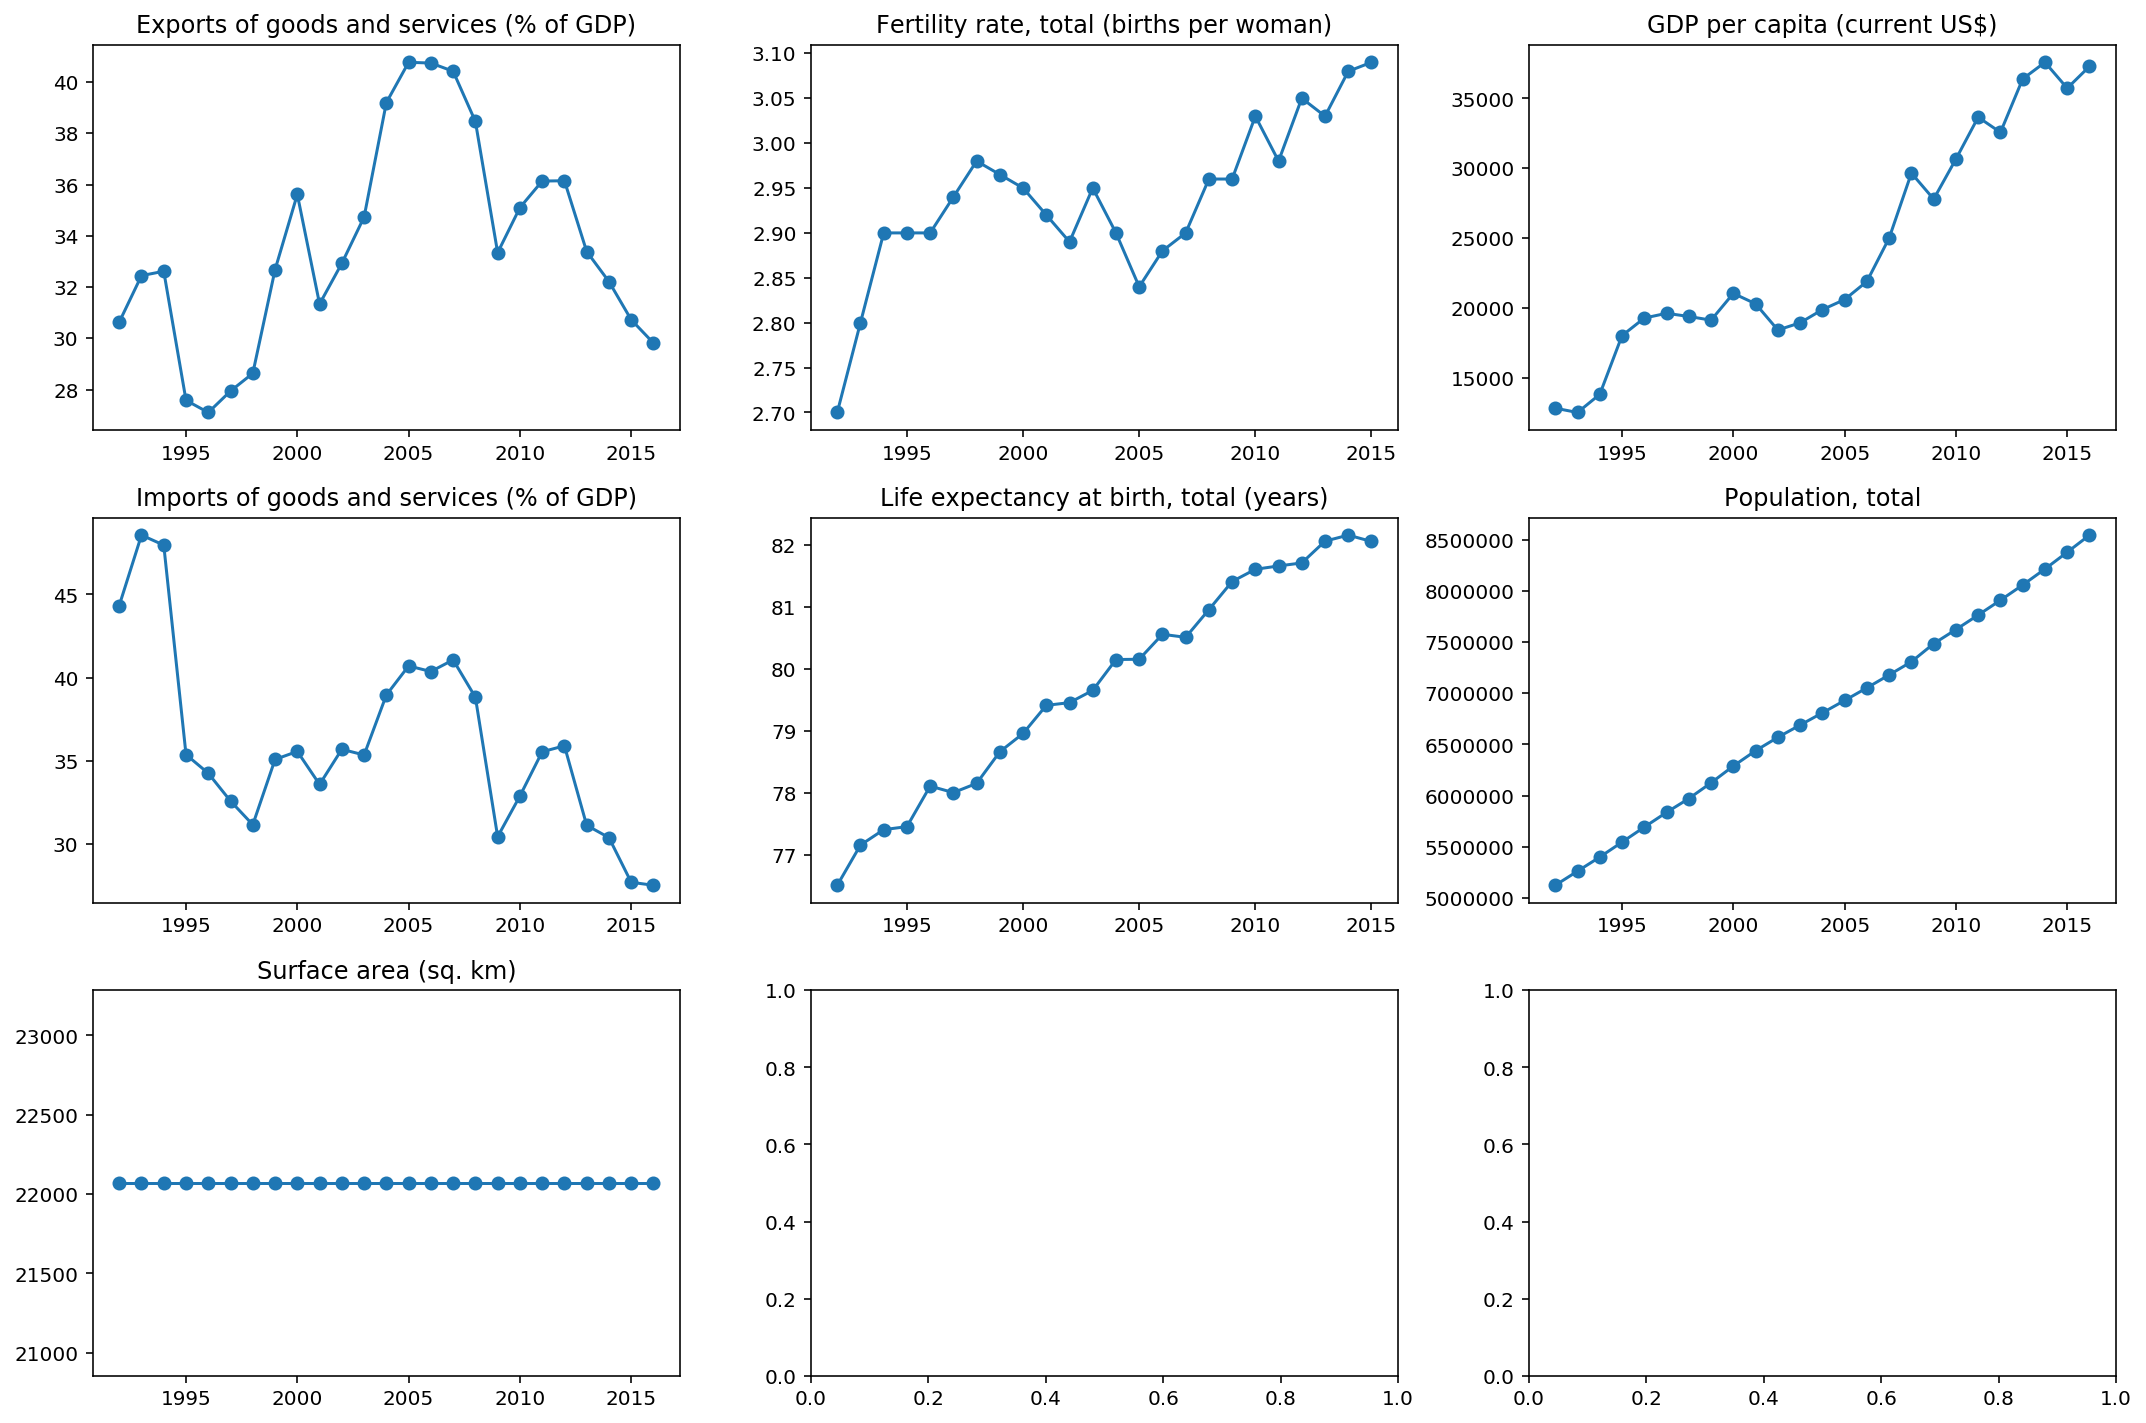

In [22]:

figure, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.ravel() # flatten the matrix of `axis` objects into a flat vector
groupped = israel_data.groupby('SeriesName')
for ax, (series, table) in zip(axes, groupped):
    ax.plot(table.Year, table.value, '-o')
    ax.set_title(series)
   
figure.tight_layout()


**Now, it's your turn to work**

Let's define `t` as the time in years since the first available measurement. Let's define `p` as country's population at any given year, divided by the population at the time `t = 0`. Similarly, let's define `l` as country's life expectancy at any given year, divided by the life expectancy at time `t=0`.

Perform linear regression of `l` as a function of `t`, and of `p` as a function of `t`. Create a figure with two subplots arranged in a single row. In the left subplot, present the evolution of `l` over the time, as well as the modelled dynamics. Present the similar values for `p` in the righmost subplot. Supply each subplot with a title of the format `Life epexpectancy. Slope: XX`. Replace "XX" with the actual slope values to the three digits after the dot. When creating the subplots, use the option `sharey`, so that the Y axes of the two subplots are aligned. What parameter, life expectancy or the population size, shows faster groth?

Save the resulting figure to the file `metric_evolution.png`

In [23]:
multi_year = pd.read_csv("../ex1/country_metrics_multiyear.csv")

In [24]:
israel_data.set_index("SeriesName").transpose().columns.value_counts()

Imports of goods and services (% of GDP)    25
GDP per capita (current US$)                25
Population, total                           25
Surface area (sq. km)                       25
Exports of goods and services (% of GDP)    25
Life expectancy at birth, total (years)     24
Fertility rate, total (births per woman)    24
Name: SeriesName, dtype: int64

In [25]:
#t = time in years since countrys first available measurement
# p = countrys population at any given year
# l = life_expectancy at given year, divided by life expectancy at time 0

# l = tx + p

In [67]:
life_expectancy = israel_data.loc[israel_data.SeriesName == 'Life expectancy at birth, total (years)']


population = israel_data.loc[israel_data.SeriesName == 'Population, total']


In [68]:
population = population.dropna()

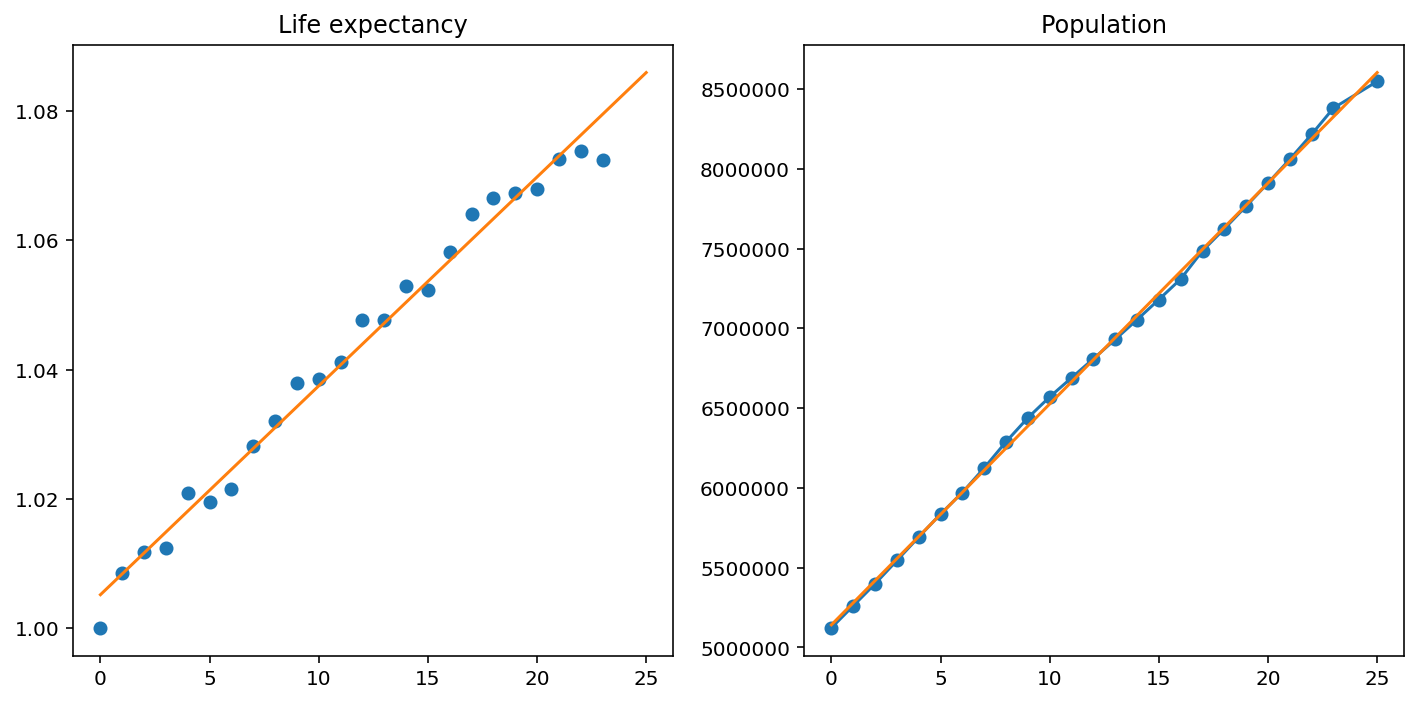

In [125]:
life_expectancy_t0 = life_expectancy.loc[life_expectancy.Year.argmin()].value
t = life_expectancy.Year - min(life_expectancy.Year)
p = population.value
l = life_expectancy.value / life_expectancy_t0

t[168] = 25


poly_x_t = np.polyfit(x = t[:24], 
               y = l,deg = 1)
model_x_t = np.linspace(0, 25, 25)
model_y_t = np.polyval(x = model_x, p = poly_x_t)


poly_x_p = np.polyfit(x = t, 
               y = p,deg = 1)
model_x_p = np.linspace(0, 25, 25)
model_y_p = np.polyval(x = model_x, p = poly_x_p)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10, 5))

ax = axes[0]
ax.plot(t[:24], l, 'o', label='data')

ax.plot(model_x_t, model_y_t, label = "linreg")

ax.set_title('Life expectancy')


ax = axes[1]
ax.plot(t, p, '-o', label='data')
ax.plot(model_x_p, model_y_p, label = "linreg")

ax.set_title('Population')

fig.tight_layout()


In [126]:
fig.savefig("./metric_evolution.png") 